In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [4]:
data = pd.read_csv("players_3120.csv")

In [5]:
data.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


In [6]:
for x in data.iloc[0]:
    print (x, end=' ')

15 Ronaldinho CAM ST 34 78 78 Querétaro
2014 ~ 2016 28130 182cm / 6'0" 76kg / 168lbs Right 77 CAM 0 €4.1M €45K €0 367 84 69 50 82 82 430 86 86 87 81 90 313 50 48 73 70 72 314 74 55 41 72 72 319 60 25 66 82 86 0 78 25 28 25 54 7 14 13 6 14 1875 377 3 49 72 83 84 28 nan 

In [7]:
data.columns

Index(['name', 'Age', 'Overall rating', 'Potential', 'Team & Contract', 'ID',
       'Height', 'Weight', 'foot', 'Best overall', 'Best position', 'Growth',
       'Value', 'Wage', 'Release clause', 'Total attacking', 'Crossing',
       'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
       'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing',
       'Ball control', 'Total movement', 'Acceleration', 'Sprint speed',
       'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power',
       'Jumping', 'Stamina', 'Strength', 'Long shots', 'Total mentality',
       'Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties',
       'Composure', 'Total defending', 'Defensive awareness',
       'Standing tackle', 'Sliding tackle', 'Total goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total stats', 'Base stats', 'International reputation',
       'Pace / Diving', 'Shooting / Handling', 'Passing / K

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3120 non-null   object 
 1   Age                       3120 non-null   int64  
 2   Overall rating            3120 non-null   object 
 3   Potential                 3120 non-null   object 
 4   Team & Contract           3120 non-null   object 
 5   ID                        3120 non-null   int64  
 6   Height                    3120 non-null   object 
 7   Weight                    3120 non-null   object 
 8   foot                      3120 non-null   object 
 9   Best overall              3120 non-null   int64  
 10  Best position             3120 non-null   object 
 11  Growth                    3120 non-null   int64  
 12  Value                     3120 non-null   object 
 13  Wage                      3120 non-null   object 
 14  Release 

# Preprocessing

In [9]:
df = data.copy().drop(["ID", "name", "Unnamed: 64", "Team & Contract"], axis=1)

In [10]:
# Foot
pd.set_option('future.no_silent_downcasting', True)
df['foot'] = data['foot'].replace(["Right", "Left"], [0, 1])
df['foot'] = df['foot'].astype("float")

In [11]:
for x in data.iloc[0]:
    print (x, end=' ')
print('\n')
for x in df.iloc[5]:
    print (x, end=' ')
print('\n')
df.info()

15 Ronaldinho CAM ST 34 78 78 Querétaro
2014 ~ 2016 28130 182cm / 6'0" 76kg / 168lbs Right 77 CAM 0 €4.1M €45K €0 367 84 69 50 82 82 430 86 86 87 81 90 313 50 48 73 70 72 314 74 55 41 72 72 319 60 25 66 82 86 0 78 25 28 25 54 7 14 13 6 14 1875 377 3 49 72 83 84 28 nan 

26 74 75 168cm / 5'6" 69kg / 152lbs 1.0 75 ST 1 €5M €19K €9.9M 358 63 79 73 73 70 352 72 72 68 65 75 417 81 83 89 73 91 346 72 75 74 50 75 322 70 40 74 72 66 73 131 50 38 43 65 13 16 10 14 12 1991 409 1 82 75 69 76 46 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Overall rating            3120 non-null   object 
 2   Potential                 3120 non-null   object 
 3   Height                    3120 non-null   object 
 4   Weight                    3120 non-null   object 
 5   foot        

In [12]:
# Value from € to float
pd.set_option('future.no_silent_downcasting', True)

ValueToFloat = data['Value'].str.strip('€').str.extract('(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Value'] = ValueToFloat.prod(axis=1).astype("float64")

# Wage
ValueToFloat = data['Wage'].str.strip('€').str.extract('(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Wage'] = ValueToFloat.prod(axis=1).astype("float64")

# Release clause
ValueToFloat = data['Release clause'].str.strip('€').str.extract('(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Release clause'] = ValueToFloat.prod(axis=1).astype("float64")

In [11]:
for x in df.iloc[5]:
    print (x, end=' ')

26 74 75 168cm / 5'6" 69kg / 152lbs 1.0 75 ST 1 5000000.0 19000.0 9900000.0 358 63 79 73 73 70 352 72 72 68 65 75 417 81 83 89 73 91 346 72 75 74 50 75 322 70 40 74 72 66 73 131 50 38 43 65 13 16 10 14 12 1991 409 1 82 75 69 76 46 

In [12]:
df.iloc[10]

Age                                23
Overall rating                   83+1
Potential                        87+1
Height                   192cm / 6'4"
Weight                  77kg / 170lbs
                            ...      
Pace / Diving                      84
Shooting / Handling                83
Passing / Kicking                  72
Dribbling / Reflexes               85
Defending / Pace                   39
Name: 10, Length: 61, dtype: object

In [13]:
# Height

ValueToInt = data['Height'].str.split("/", expand=True)
ValueToInt.drop(1, axis=1, inplace=True)
ValueToInt[0] = ValueToInt[0].str.replace('cm', "").astype("int")
df['Height'] = ValueToInt

# Weight
ValueToInt = data['Weight'].str.split("/", expand=True)
ValueToInt.drop(1, axis=1, inplace=True)
ValueToInt[0] = ValueToInt[0].str.replace('kg', "").astype("int")
df['Weight'] = ValueToInt

In [14]:
for x in df.iloc[5]:
    print (x, end=' ')

26 74 75 168 69 1.0 75 ST 1 5000000.0 19000.0 9900000.0 358 63 79 73 73 70 352 72 72 68 65 75 417 81 83 89 73 91 346 72 75 74 50 75 322 70 40 74 72 66 73 131 50 38 43 65 13 16 10 14 12 1991 409 1 82 75 69 76 46 

In [15]:
print(data["Team & Contract"].iloc[5])

print('\n')
for x in data.iloc[100]:
    print (x, end=' ')

Ipswich Town
2021 ~ 2026


Palhinha CDM 27 84 85 Fulham
2022 ~ 2028 229391 190cm / 6'3" 85kg / 187lbs Right 86 CB 1 €43M €110K €84.9M 339 60 66 79 79 55 349 77 66 45 80 81 331 63+4 67 64 80 57+2 412 81 86+2 88 90 67 376 95 83 69 72 57 84 259 84 88 87 46 14 10 8 7 7 2112 456 2 65 68 72 76 85 nan 

**The following treatment is based on certain hypotheses.** \
-Converts loan contracts and free agents into "2023" or "2024", assuming the player's contract started in those years.\
-If the end year is missing (NaN), assume it ends 1 year after the start.

In [14]:
# Team & Contract

TeamCont = data["Team & Contract"].str.split("\n", expand=True)
TeamCont.drop(0, axis=1, inplace=True)
TeamCont = TeamCont[1].str.split("~", expand=True)
TeamCont[0] = TeamCont[0].str.replace('Jun 30, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Dec 31, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Jun 30, 2025 On loan', "2024")
TeamCont[0] = TeamCont[0].str.replace('May 31, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Free', "2023")
TeamCont[1] = TeamCont[1].fillna(0)

TeamCont[0] = TeamCont[0].astype("float")
TeamCont[1] = TeamCont[1].astype("float")

TeamCont[1] = TeamCont[1].replace([0], np.nan)
TeamCont[1] = TeamCont[1].fillna(TeamCont[0] + 1)

df["Start"] = TeamCont[0]
df["End"] = TeamCont[1]

If the end year is missing (NaN), assume it ends 1 year after the start.

In [15]:
# Best Position
df["Best position"] = df["Best position"].astype("category")
df["Best position"] = df["Best position"].cat.codes

In [16]:
# Object Columns
def dfObjectSplit(column):
    split = data[column].str.split('+', expand=True)
    split2 = split[0].str.split('-', expand=True)
    df[column] = split2[0]
    df[column] = df[column].astype("float")

In [17]:
dfObjectSplit("Overall rating")

dfObjectSplit("Potential")

dfObjectSplit("Crossing")
dfObjectSplit("Finishing")
dfObjectSplit("Heading accuracy")
dfObjectSplit("Short passing")
dfObjectSplit("Volleys")

dfObjectSplit("Dribbling")
dfObjectSplit("Curve")
dfObjectSplit("FK Accuracy")
dfObjectSplit("Long passing")
dfObjectSplit("Ball control")

dfObjectSplit("Acceleration")
dfObjectSplit("Sprint speed")
dfObjectSplit("Agility")
dfObjectSplit("Reactions")
dfObjectSplit("Balance")

dfObjectSplit("Shot power")
dfObjectSplit("Jumping")
dfObjectSplit("Stamina")
dfObjectSplit("Strength")
dfObjectSplit("Long shots")

dfObjectSplit("Aggression")
dfObjectSplit("Interceptions")
dfObjectSplit("Att. Position")
dfObjectSplit("Vision")
dfObjectSplit("Penalties")
dfObjectSplit("Composure")
dfObjectSplit("Vision")

dfObjectSplit("Defensive awareness")
dfObjectSplit("Standing tackle")
dfObjectSplit("Sliding tackle")

dfObjectSplit("GK Diving")
dfObjectSplit("GK Handling")
dfObjectSplit("GK Kicking")
dfObjectSplit("GK Positioning")
dfObjectSplit("GK Reflexes")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Overall rating            3120 non-null   float64
 2   Potential                 3120 non-null   float64
 3   Height                    3120 non-null   int64  
 4   Weight                    3120 non-null   int64  
 5   foot                      3120 non-null   float64
 6   Best overall              3120 non-null   int64  
 7   Best position             3120 non-null   int8   
 8   Growth                    3120 non-null   int64  
 9   Value                     3120 non-null   float64
 10  Wage                      3120 non-null   float64
 11  Release clause            3120 non-null   float64
 12  Total attacking           3120 non-null   int64  
 13  Crossing                  3120 non-null   float64
 14  Finishin

# Data Analysis

In [19]:
df

,Age,Overall rating,Potential,Height,Weight,foot,Best overall,Best position,Growth,Value,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Start,End
0,34,78.0,78.0,182,76,0.0,77,0,0,4100000.0,...,1875,377,3,49,72,83,84,28,2014.0,2016.0
1,19,65.0,81.0,174,65,1.0,67,0,16,1800000.0,...,1651,351,1,72,54,61,70,44,2022.0,2025.0
2,23,82.0,86.0,170,68,0.0,84,0,4,43500000.0,...,1897,409,1,85,74,78,85,31,2019.0,2027.0
3,17,62.0,80.0,178,72,0.0,65,0,18,1000000.0,...,1644,353,1,72,50,59,66,52,2024.0,2028.0
4,18,77.0,88.0,175,70,1.0,79,0,11,22000000.0,...,1960,405,1,72,70,80,81,52,2023.0,2029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,19,65.0,78.0,178,69,0.0,66,2,13,1600000.0,...,1655,357,1,64,46,60,61,63,2023.0,2024.0
3116,20,62.0,72.0,180,81,1.0,62,9,10,825000.0,...,1592,347,1,75,35,54,60,57,2023.0,2024.0
3117,19,69.0,82.0,190,85,0.0,69,5,13,2900000.0,...,1066,372,1,70,68,69,72,24,2023.0,2024.0
3118,17,54.0,69.0,189,88,0.0,56,14,15,250000.0,...,1308,283,1,64,53,40,51,19,2023.0,2026.0


<Axes: xlabel='Release clause', ylabel='Value'>

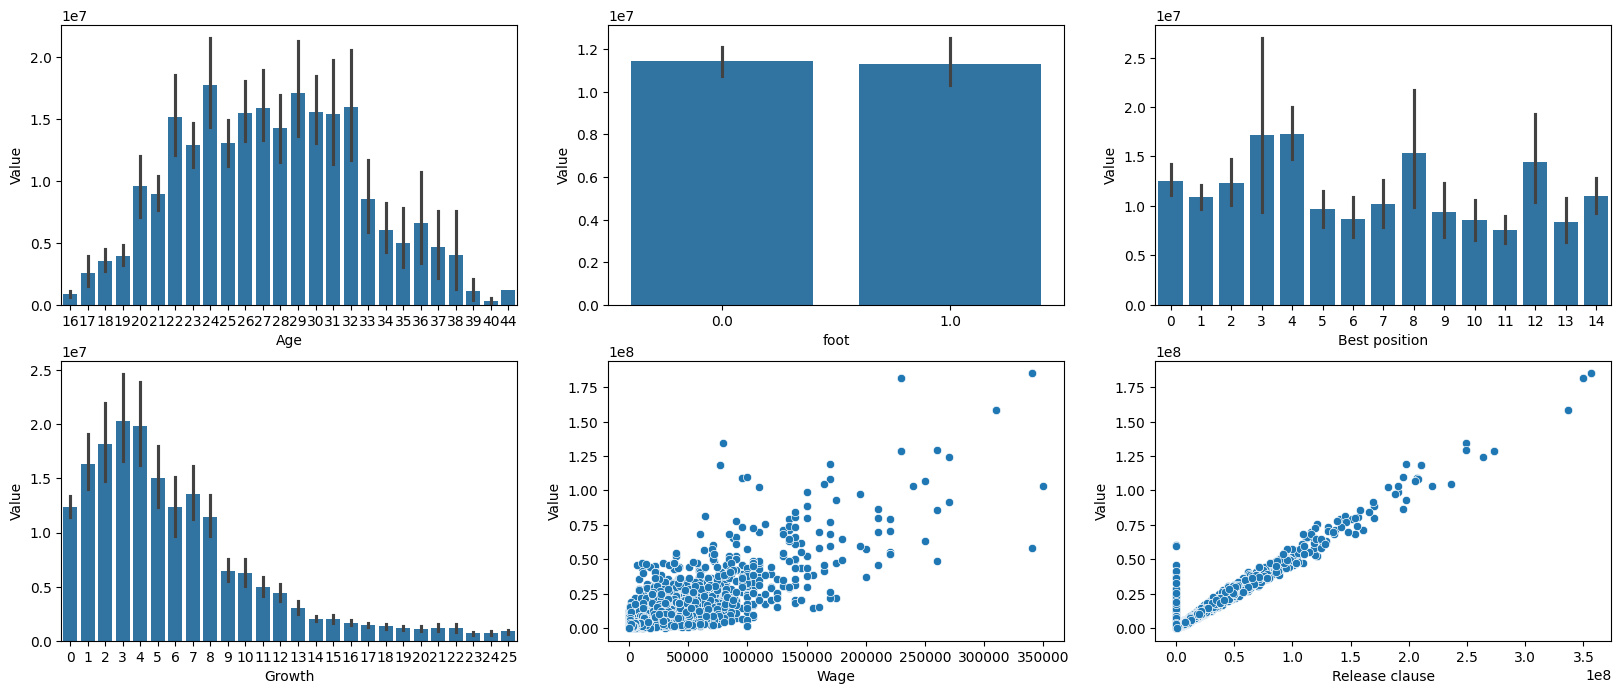

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))

sns.barplot(data=df.groupby('Age', as_index=False)['Value'].mean(), x=df.Age, y=df.Value, ax=ax[0][0])
sns.barplot(data=df.groupby('foot', as_index=False)['Value'].mean(), x=df.foot, y=df.Value, ax=ax[0][1])
sns.barplot(data=df.groupby('Best position', as_index=False)['Value'].mean(), x=df["Best position"], y=df.Value, ax=ax[0][2])

sns.barplot(data=df.groupby('Growth', as_index=False)['Value'].mean(), x=df["Growth"], y=df.Value, ax=ax[1][0])
sns.scatterplot(data=df, x=df.Wage, y=df.Value, ax=ax[1][1])
sns.scatterplot(data=df, x=df["Release clause"], y=df.Value, ax=ax[1][2])

<Axes: xlabel='Overall rating', ylabel='Value'>

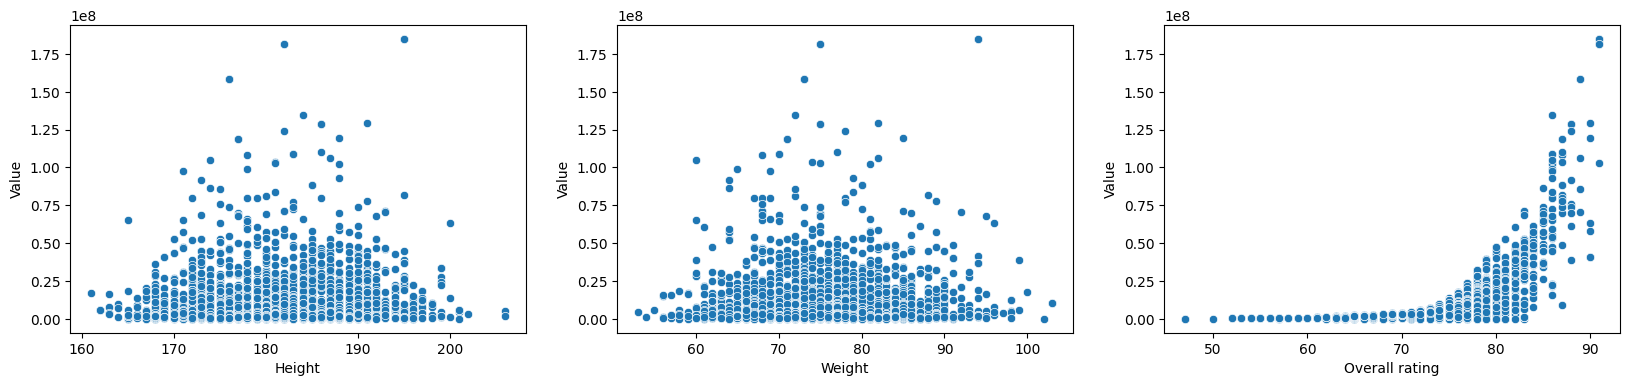

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

sns.scatterplot(data=df, x=df.Height, y=df.Value, ax=ax[0])
sns.scatterplot(data=df, x=df.Weight, y=df.Value, ax=ax[1])
sns.scatterplot(data=df, x=df["Overall rating"], y=df.Value, ax=ax[2])

<Axes: xlabel='Total stats', ylabel='Value'>

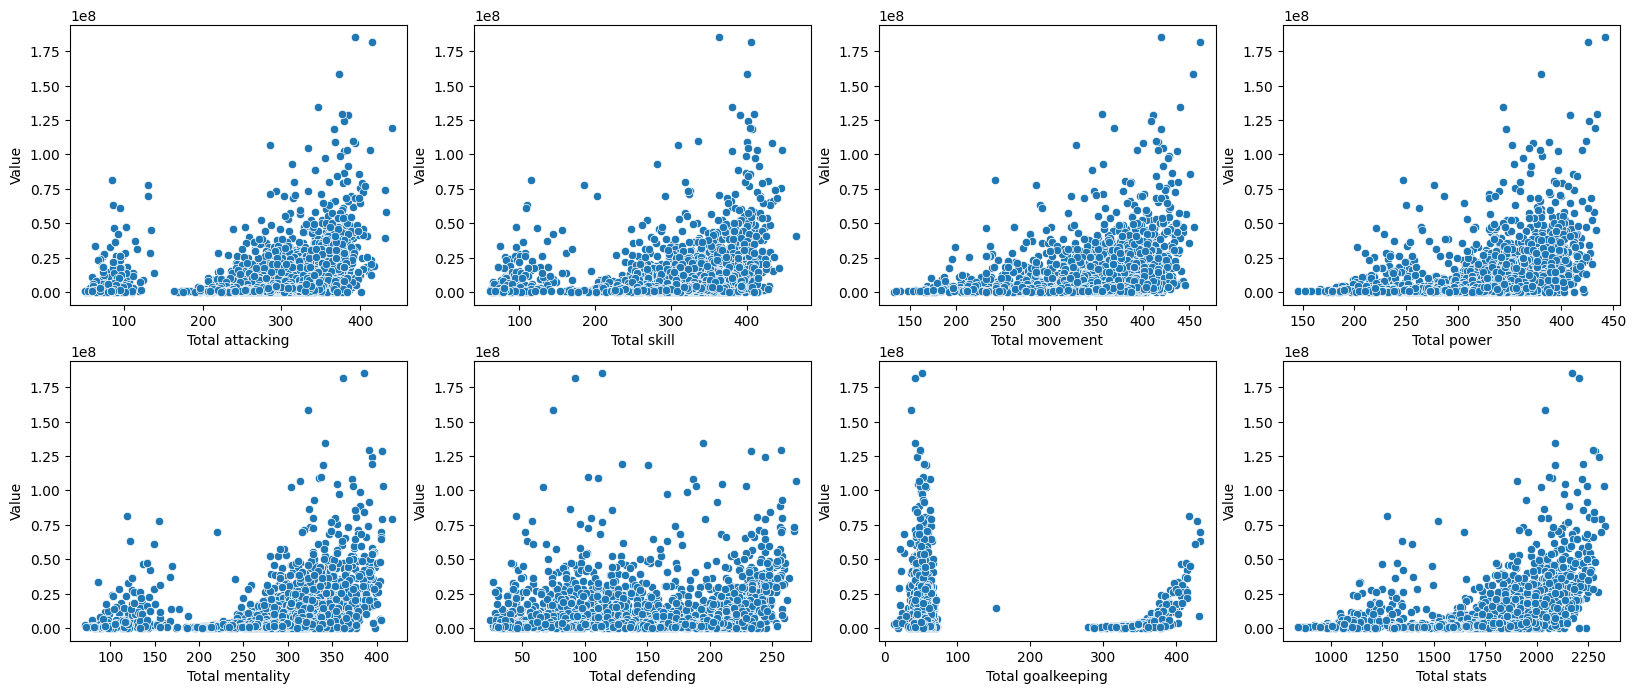

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

sns.scatterplot(data=df, x=df["Total attacking"], y=df.Value, ax=ax[0][0])
sns.scatterplot(data=df, x=df["Total skill"], y=df.Value, ax=ax[0][1])
sns.scatterplot(data=df, x=df["Total movement"], y=df.Value, ax=ax[0][2])
sns.scatterplot(data=df, x=df["Total power"], y=df.Value, ax=ax[0][3])
sns.scatterplot(data=df, x=df["Total mentality"], y=df.Value, ax=ax[1][0])
sns.scatterplot(data=df, x=df["Total defending"], y=df.Value, ax=ax[1][1])
sns.scatterplot(data=df, x=df["Total goalkeeping"], y=df.Value, ax=ax[1][2])
sns.scatterplot(data=df, x=df["Total stats"], y=df.Value, ax=ax[1][3])

## HeatMap

my method of dropping correlated columns


In [113]:
df2 = df.copy()
corr_matrix = df.corr().abs()  # Get the absolute values of correlation

# Set a threshold for high correlation
threshold = 0.9

# Find the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns with correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Columns to drop based on correlation:")
print(to_drop)
df2=df.drop(columns=to_drop)


Columns to drop based on correlation:
['Best overall', 'Release clause', 'Volleys', 'Total skill', 'Dribbling', 'Curve', 'Ball control', 'Acceleration', 'Agility', 'Reactions', 'Long shots', 'Att. Position', 'Total defending', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total stats', 'Defending / Pace']


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Overall rating            3120 non-null   float64
 2   Potential                 3120 non-null   float64
 3   Height                    3120 non-null   int64  
 4   Weight                    3120 non-null   int64  
 5   foot                      3120 non-null   float64
 6   Best position             3120 non-null   int8   
 7   Growth                    3120 non-null   int64  
 8   Value                     3120 non-null   float64
 9   Wage                      3120 non-null   float64
 10  Total attacking           3120 non-null   int64  
 11  Crossing                  3120 non-null   float64
 12  Finishing                 3120 non-null   float64
 13  Heading accuracy          3120 non-null   float64
 14  Short pa

<Axes: >

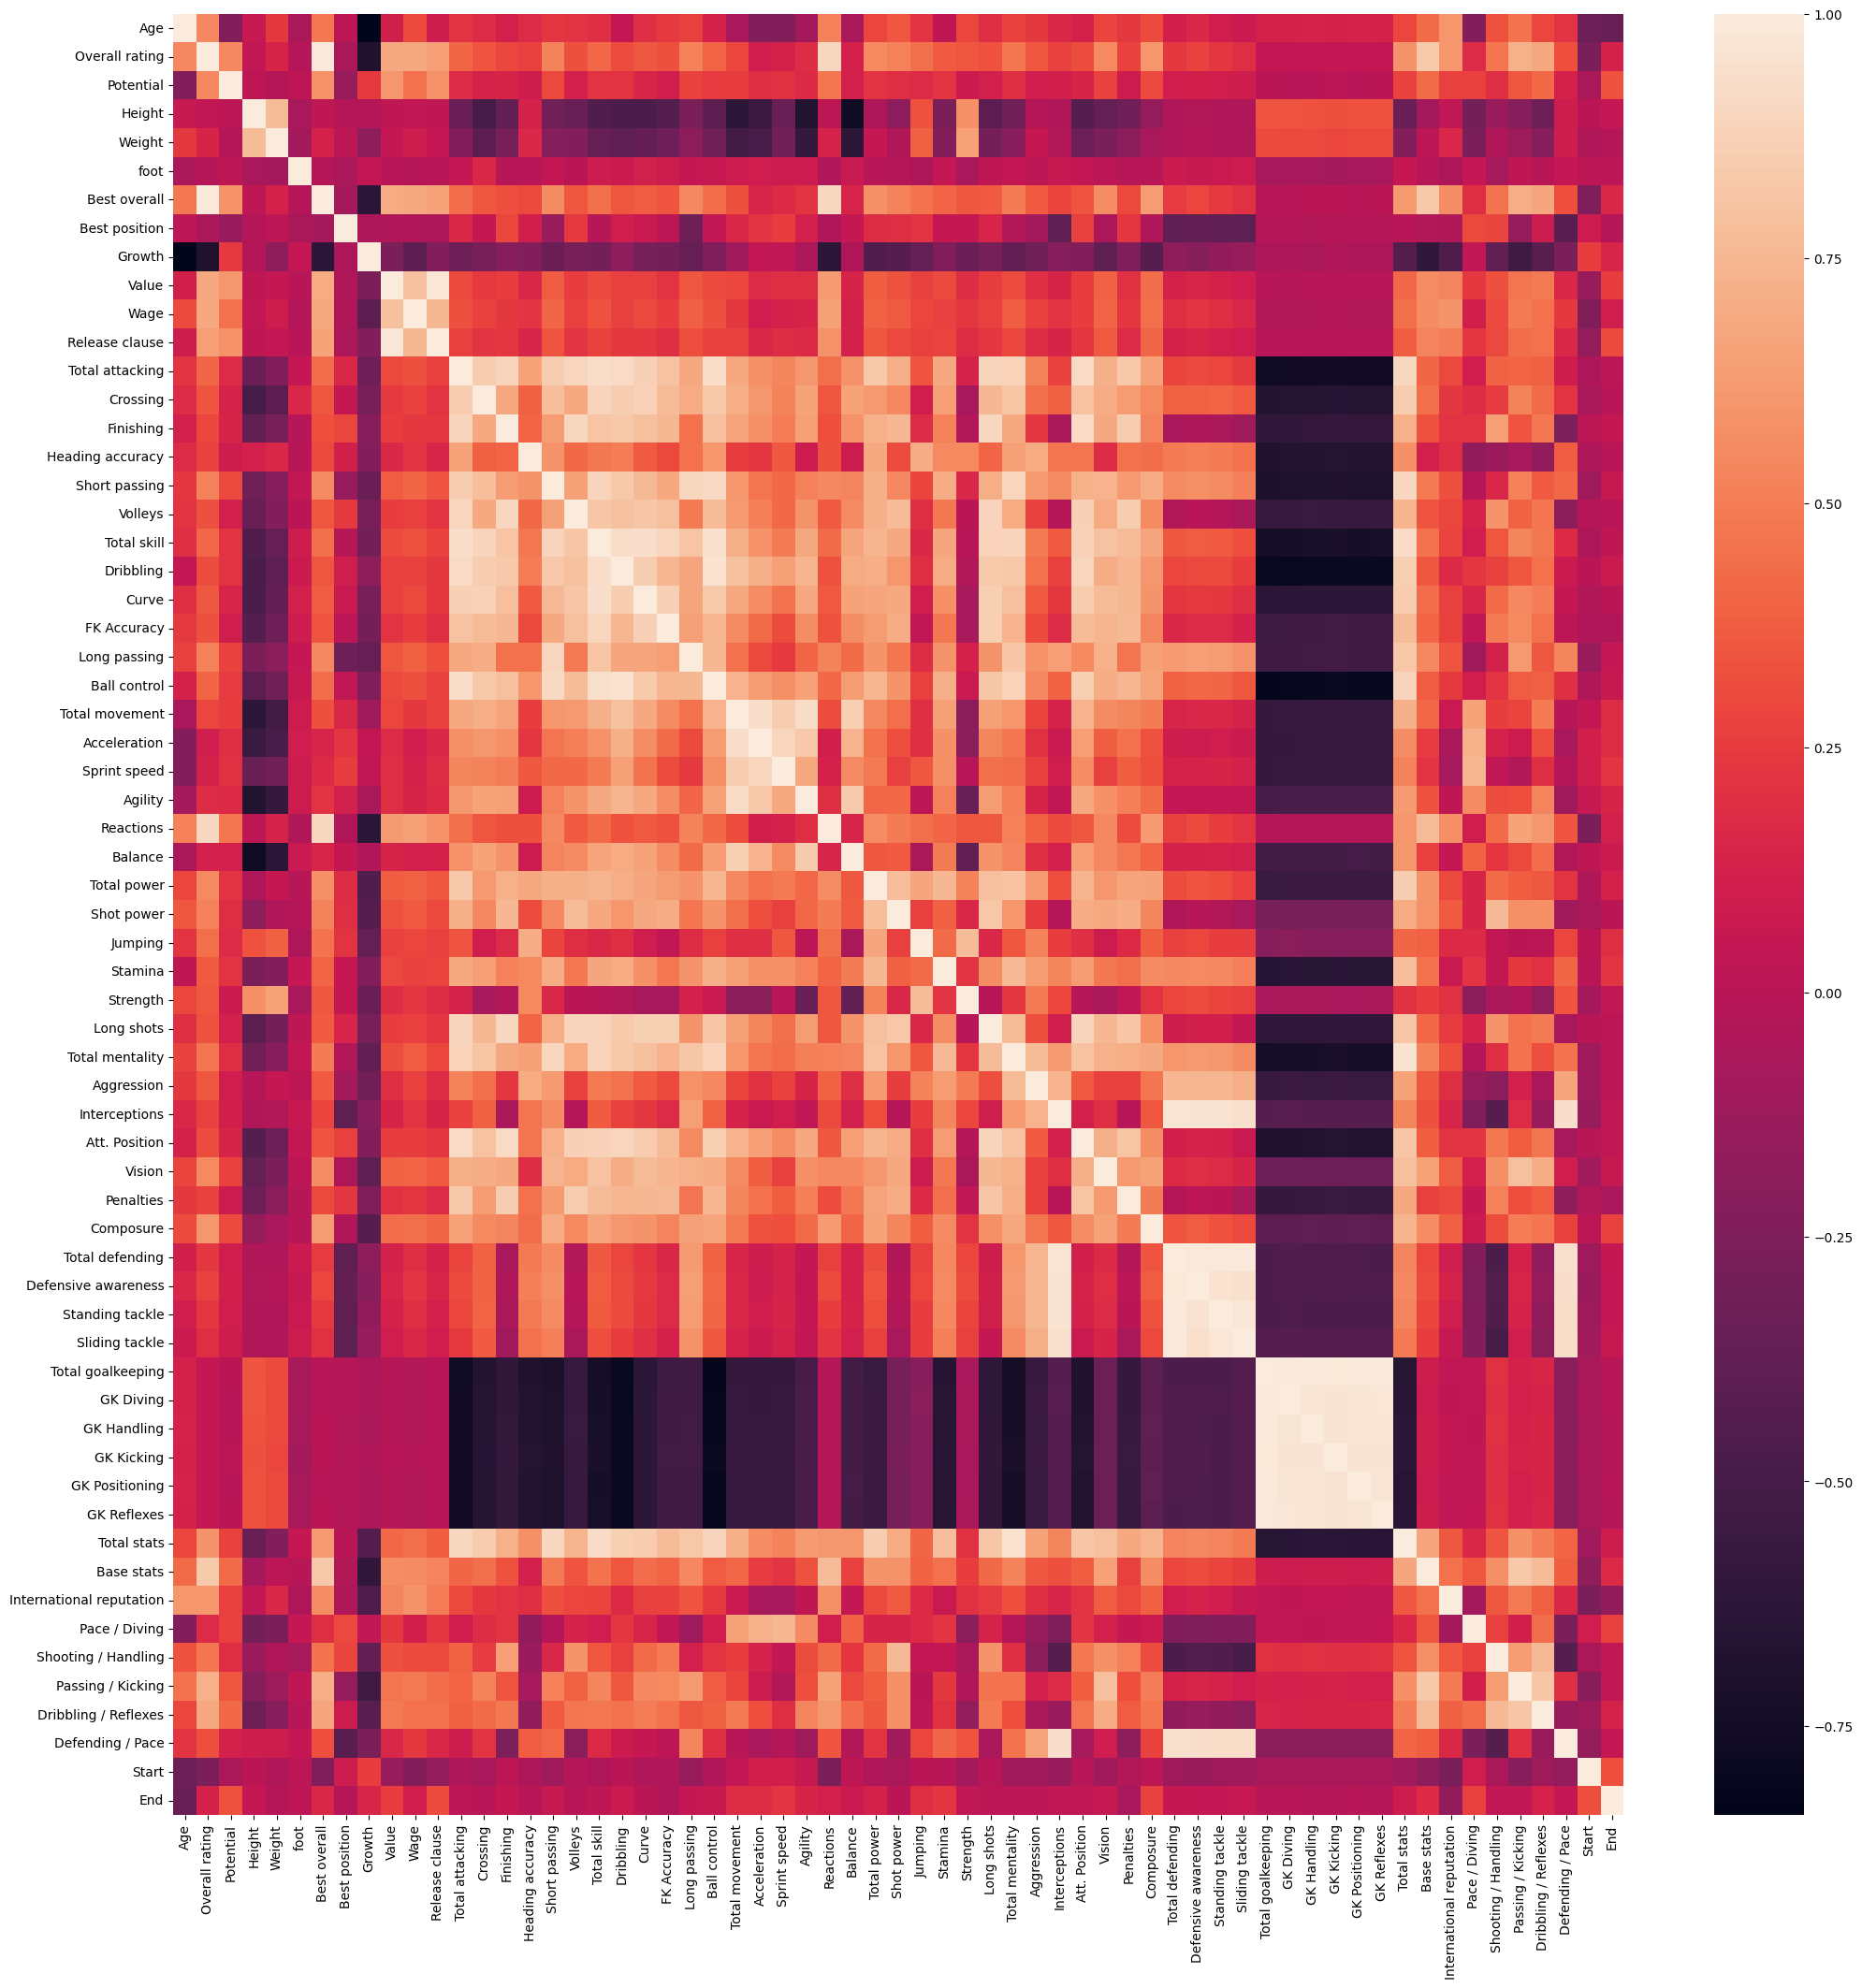

In [23]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr())

## Drop some correlated columns

In [24]:
# Drop some correlated columns
dfDrop = df.copy()

# Total Stats
dfDrop.drop(["Total attacking", "Crossing", "Finishing", "Heading accuracy", "Short passing", "Volleys", "Total skill",
            "Dribbling", "Curve","FK Accuracy","Long passing","Ball control","Total movement","Acceleration","Sprint speed",
             "Agility","Balance","Total power","Shot power","Stamina","Long shots","Total mentality","Aggression",
             "Att. Position","Vision","Penalties","Composure"], axis=1, inplace=True)

# Overall Rating
dfDrop.drop(["Best overall", "Reactions", "Base stats"], axis=1, inplace=True)

# Defending
dfDrop.drop(["Interceptions", "Defensive awareness", "Standing tackle", "Sliding tackle", "Defending / Pace"], axis=1, inplace=True)

# Goalkeeping
dfDrop.drop(["GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes"], axis=1, inplace=True)

# Passing / Kicking
dfDrop.drop(["Dribbling / Reflexes"], axis=1, inplace=True)

# Base stats
#dfDrop.drop(["Passing / Kicking"], axis=1, inplace=True)

In [25]:
dfDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Overall rating            3120 non-null   float64
 2   Potential                 3120 non-null   float64
 3   Height                    3120 non-null   int64  
 4   Weight                    3120 non-null   int64  
 5   foot                      3120 non-null   float64
 6   Best position             3120 non-null   int8   
 7   Growth                    3120 non-null   int64  
 8   Value                     3120 non-null   float64
 9   Wage                      3120 non-null   float64
 10  Release clause            3120 non-null   float64
 11  Jumping                   3120 non-null   float64
 12  Strength                  3120 non-null   float64
 13  Total defending           3120 non-null   int64  
 14  Total go

<Axes: >

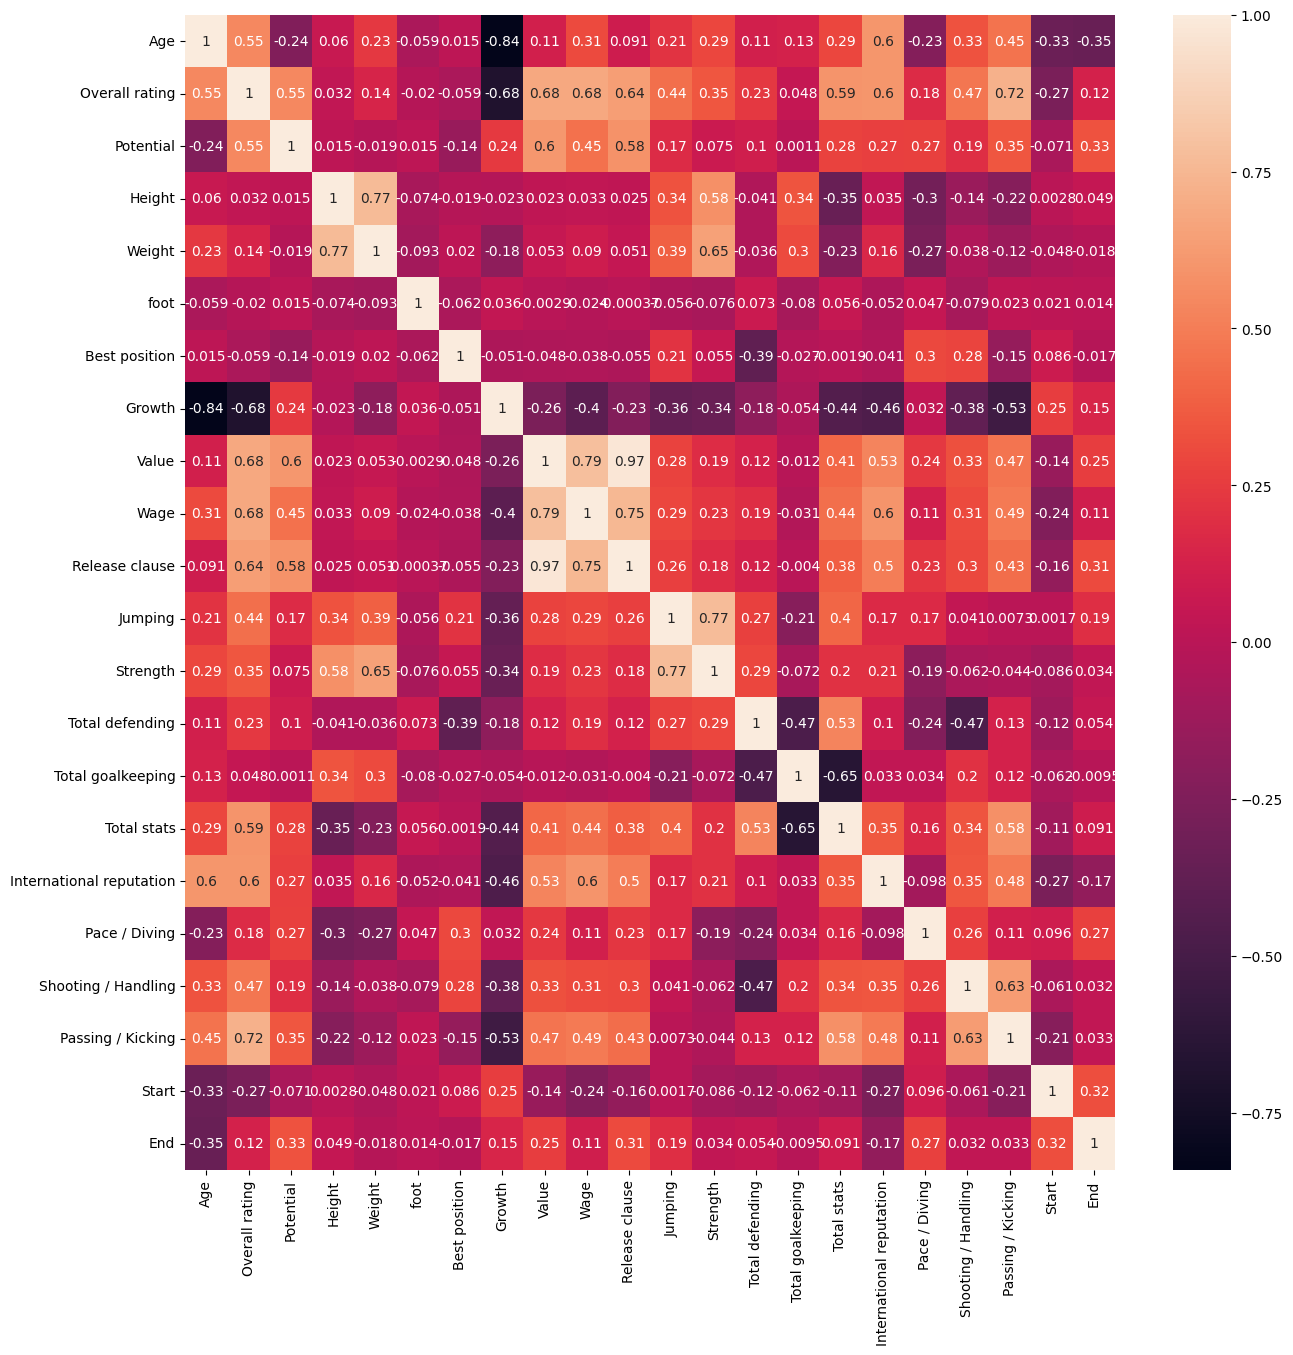

In [27]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dfDrop.corr(), annot=True)

# Predict

In [29]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error

In [29]:
X = dfDrop.drop(["Value","Wage"], axis=1)
y = dfDrop["Value"]

X_t, X_val, y_t, y_val = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=42)

In [30]:
import joblib

rf = RandomForestRegressor(random_state=0)
rf.fit(X_t, y_t)

joblib.dump(rf, "rf_value_prediction.pkl")

# Load the model later
# rf_loaded = joblib.load("random_forest_model.pkl")

['rf_value_prediction.pkl']

In [31]:
rf_predict = rf.predict(X_val)

print ("Mean Absolute Error: ", mean_absolute_error(rf_predict, y_val))

Mean Absolute Error:  795822.3044871795


In [32]:
from sklearn.metrics import  r2_score

# Calculate R-squared (R²) score
r2 = r2_score(y_val, rf_predict)
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.9892175434163052


In [ ]:
new_player_data = {
    "Age": 34.0,
    "Overall rating": 78.0,
    "Potential": 78.0,
    "Height": 182.0,
    "Weight": 76.0,
    "foot": 0.0,
    "Best position": 0.0,
    "Growth": 0.0,
    "Release clause": 1.0,
    "Jumping": 55.0,
    "Strength": 72.0,
    "Total defending": 78.0,
    "Total goalkeeping": 54.0,
    "Total stats": 1875.0,
    "International reputation": 3.0,
    "Pace / Diving": 49.0,
    "Shooting / Handling": 72.0,
    "Passing / Kicking": 83.0,
    "Start": 2014.0,
    "End": 2016.0
}
# Convert the new player data to a pandas DataFrame
new_player_df = pd.DataFrame([new_player_data])

# Ensure that the new data has the same preprocessing applied as your training data
# For instance, if you performed any transformations (like encoding or scaling), apply them here.
# Example: 
# new_player_df['Best position'] = new_player_df['Best position'].astype("category").cat.codes
# new_player_df['foot'] = new_player_df['foot'].replace([0, 1], ["Right", "Left"])

# Use the trained RandomForest model to predict the value
predicted_value = rf.predict(new_player_df)

print(f"Predicted value for the new player: €{predicted_value[0]:,.2f}")

Predicted value for the new player: €3,067,250.15
